<a href="https://colab.research.google.com/github/KwonDuHyeon/hanghae99/blob/main/5%EC%A3%BC%EC%B0%A8_%EC%8B%AC%ED%99%94%EA%B3%BC%EC%A0%9C(%EA%B6%8C%EB%91%90%ED%98%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import base64
import matplotlib.pyplot as plt
from PIL import Image
from openai import OpenAI

## [MY CODE] OpenAI API키 호출

In [ ]:
from dotenv import load_dotenv
import os
import openai
load_dotenv('/mnt/d/hanghae99/apikey/.env')  # .env 파일을 로드



# 환경 변수 확인
client = os.getenv("OPENAI_API_KEY")

if client:
    print("API 키를 성공적으로 가져왔습니다.")
else:
    raise ValueError("API 키를 가져오지 못했습니다. .env 파일을 확인하세요.")


API 키를 성공적으로 가져왔습니다.


## [MY CODE] 이미지 업로드

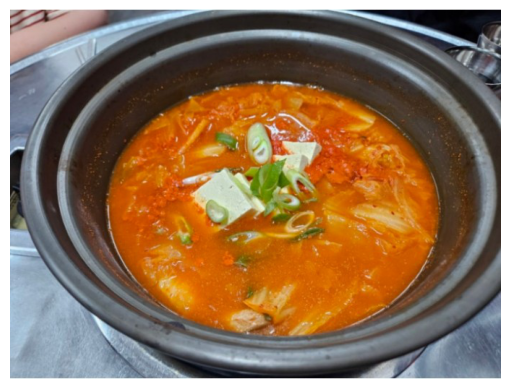

In [ ]:
image_path = "/mnt/d/kimchi.jpg"
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

In [ ]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [ ]:
image_path = "/mnt/d/kimchi.jpg"
base64_image = encode_image(image_path)

## [MY CODE] image encode 이후 gpt 업로드

In [ ]:
def image_response(base64_image):
    response = openai.chat.completions.create(
        model = "gpt-4o-mini",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": "해당 이미지는 어떤 음식이야?, 음식 이름만으로 대답해줘",
                    },
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
                    },
                ],
            }
        ],
    )

    food_name = response.choices[0].message.content
    return food_name.strip()



In [ ]:
result_food = image_response(base64_image)
print(result_food)

김치찌개


## [MY CODE] Prompt 적용

In [ ]:
def generate_prompt(food_name):
    prompt = (
        f"'{food_name}'에 대한 자세한 정보를 알려줘. "
        f"이 음식의 칼로리는 얼마이고 다이어트에 어떤 좋은효과나 부정적 효과가 있는지 설명해줘 "
        f"추가적으로 영양 성분, 탄수화물, 단백질, 지방 함량도 알려줘"
    )
    return prompt

In [ ]:
def query_llm(prompt):
    response = openai.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "user", "content": prompt}
        ],
        max_tokens=300,
        temperature=0.7
    )
    return response

In [ ]:
prompt = generate_prompt(result_food)
llm_response = query_llm(prompt)

## [MY CODE] 결과 확인

In [ ]:
result_response = llm_response.choices[0].message.content
print("LLM 응답:")
print(result_response.strip())

LLM 응답:
김치찌개는 한국의 전통적인 찌개 요리로, 주로 김치, 돼지고기, 두부, 채소 등을 재료로 사용하여 끓인 국물 요리입니다. 김치의 매콤하고 깊은 맛이 특징이며, 밥과 함께 자주 제공됩니다.

### 김치찌개의 영양 성분 (1인분 기준)

- **칼로리**: 약 250-300 kcal (재료와 조리 방법에 따라 다를 수 있음)
- **단백질**: 약 15-20g
- **탄수화물**: 약 10-15g
- **지방**: 약 15-20g

### 다이어트에 대한 효과

**좋은 효과:**
1. **저칼로리**: 김치찌개는 상대적으로 낮은 칼로리를 가지고 있어 다이어트 식단에 포함하기 좋습니다.
2. **포만감**: 다양한 재료가 들어가 있어 포만감을 주어 과식 방지에 도움이 됩니다.
3. **발효 음식**: 김치에 포함된 유산균은 장 건강에 좋고, 소화에 도움을 줄 수 있습니다.

**부정적 효과:**
1. **나트륨 함량**: 김치찌개는 소금과 발효된 김치가 들어가므로 나트


## [질문] 이런형태로 진행하는것도 멀티모달에 해당되는건가요??, 그리고 Vision 모델을 통해 이미지 학습후 prompt 진행하는것도 괜찮나요??